# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
* Найти параметры, по которым определяется цена недвижимости, чтобы система смогла следить за аномалиями и определять мошенническую деятельность
* Поиск особенностей и зависимостей, котрые есть на рынке недвижимости

**Ход исследования:**
* Изучение общей информации датасета
* Поиск и замена пропущенных значений, изменение типа данных, поиск и обработка аномалий
* Добавление новых столбцов с данными для более полного анализа
* Изучение параметров объектов недвижимости, исследование скорости продажи объектов, иучение зависимости цены от различных параметров объектов
* Определение самой высокой и самой низкой стоимости квадратного метра
* Определение зависимости цены объекта от удалённости от центра

### Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep='\t')
#Посмотрим наличие пропусков
data.info()
#Посмотрим общую информацию
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
#Выведем первые 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#Посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

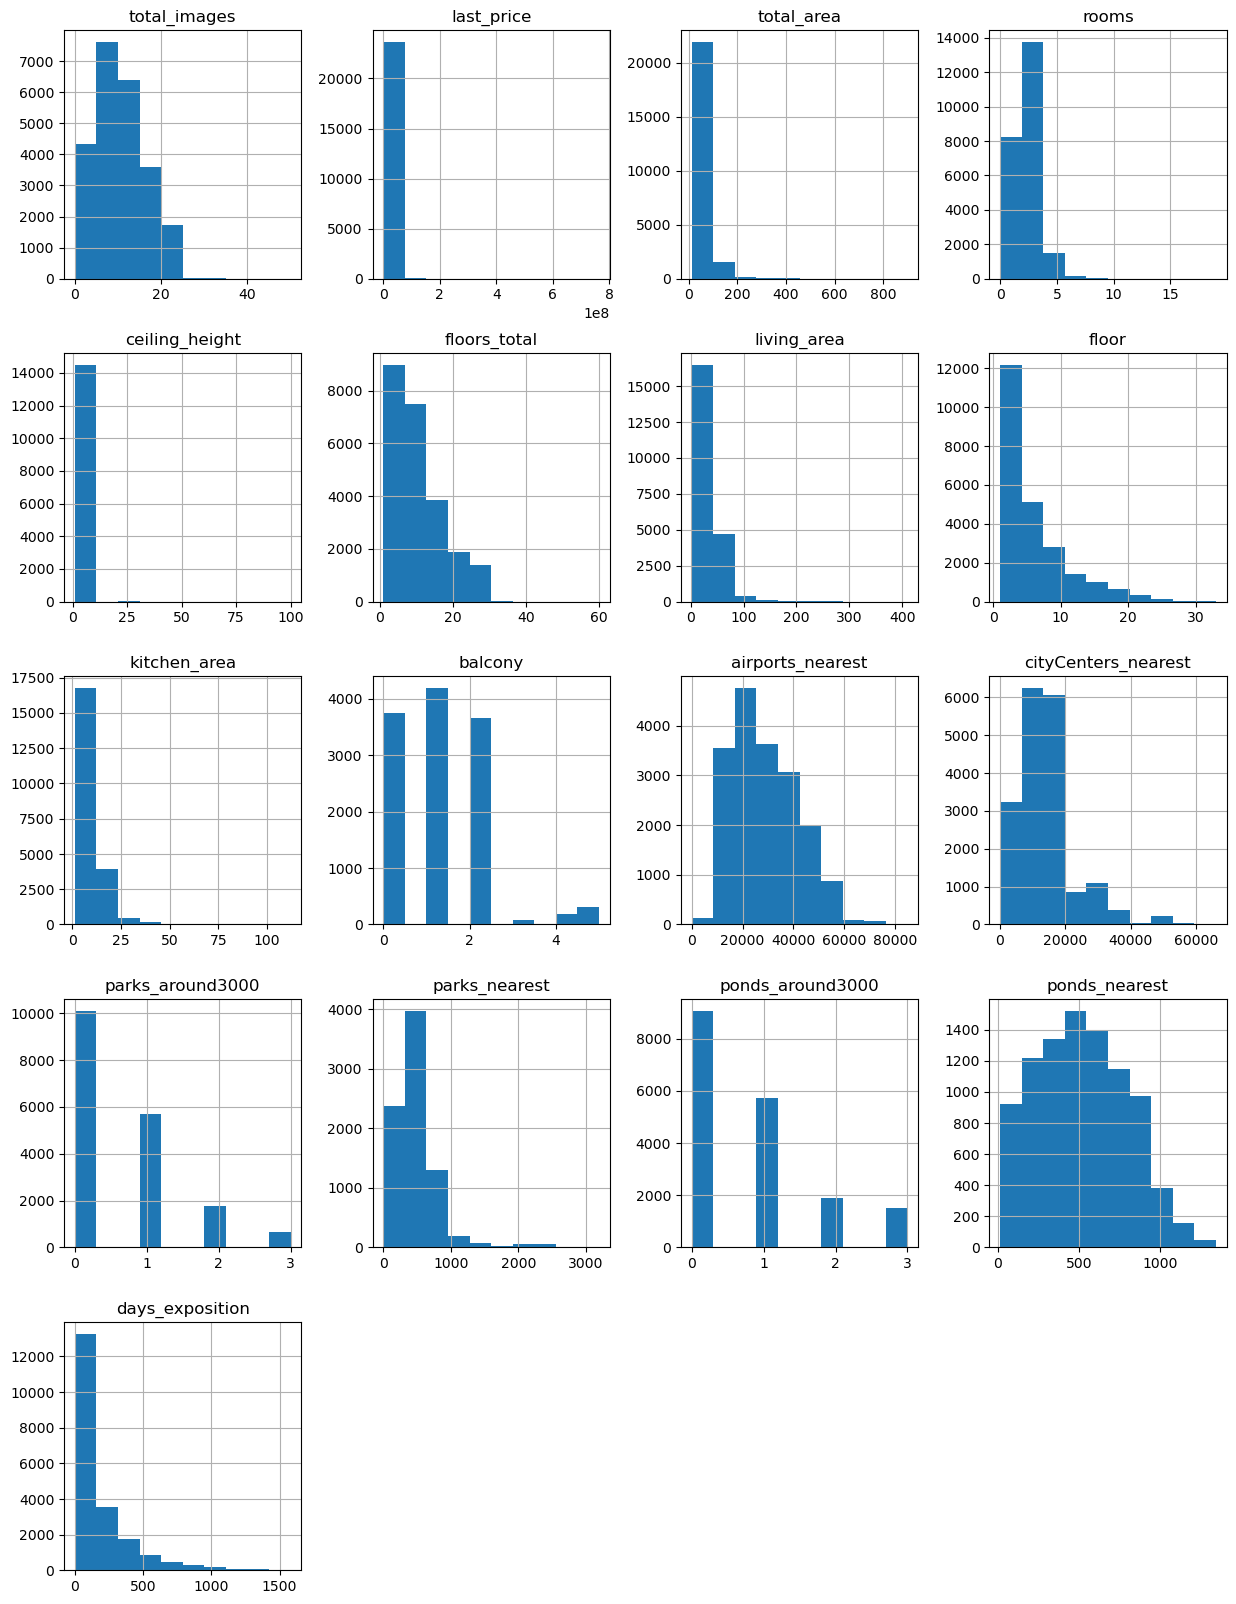

In [4]:
#Построим гистограмму для всех столбцов
import matplotlib.pyplot as plt
data.hist(grid=True, figsize=(15, 20));plt.show()

**Пройдёмся по гистограммам:**
В целом, значения распределяются нормально. Выбросов не наблюдается.

**Вывод:**   
В столбцах **ceiling_height**, **floors_total**, **living_area**, **is_apartment**, **kitchen_area**, **balcony**, **locality_name**, **airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest**, **days_exposition** есть пропуски.    
     
Также:
1. У столбца **first_day_exposition** должен быть тип "datetime"
2. У столбцов **floors_total, balcony, parks_around3000, ponds_around3000, days_exposition, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest** должен быть тип "int", т.к. числовые значения в них могут быть только целыми (вряд ли кто-то решит указать цену с копейками)
3. У столбца **is_apartment** должен быть тип "bool"
    
Данные нужно привести в порядок.

* В столбце **is_apartment** слишком много пропусков, возможно, это связано с тем, что многие люди не знают, что такое апартаменты, поэтому, при заполнении данных, они пропускали этот пункт. Знающие, наоборот, заполняли данные (раз они купили такую квартиру, значит разбираются в отличиях квартиры и апартаментов). Можно заменить NaN на "False", т.к., скорее всего, пропуски свидетельствуют о том, что квартира не является апартаментами (в договоре купли-продажи должна быть прописана информация о типе продаваемого/покупаемого помещения; в таком случае, если человек не знал, явлется ли квартира апартаментами, значит в договоре информаия про апартаменты не была указана, соответственно, помещение апартаментами не является).

* В столбце **balcony** пропуски можно заменить на "0", т.к., вероятно, что, если информация по наличию балкона не указана, то балкона нет.

* В столбце **ceiling_height** вместо пропусков можно поставить медианные значения. Пропуски могли появиться из-за того, что некоторые люди не считают эту информацию важной и обязательной к заполнению.

* Столбец **floors_total** оставим без изменений, данных для анализа досаточно. Причина может быть такой же, как и в предыдущем пункте.

* Столбцы **living_area, kitchen_area** могут быть не заполнены из-за того, что квартира является студией. Пропуски заполнить не сможем (можно было бы рассчитать их путём вычитания из общей площади кухни/жилой площади, но у нас нет данных по площади сан. узла и коридора, которые также являются частью общей площади квартиры). Заполненных строк для анализа достаточно.

* Столбец **locality_name** оставим как есть. Непонятна причина пропусков.

* В столбцах **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** данные были добавлены системой, мы их заполнить ничем не сможем, поэтому оставим всё как есть.

* Столбец **days_exposition** тоже оставим в покое. Медианные или средние значения не подойдут, т.к. длительность продажи может зависеть и от других факторов, по которым нет данных (например, шумные соседи, трубы текут, ремонта нет). Имеющихся данных для анализа достаточно. Пропуски могли быть из-за того, что продавцы не убрали объявление с сайта после продажи.

### Предобработка данных

In [5]:
#Проверим % пропусков в датасете
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
#Посмотрим количество пропусков и уникальные значения в столбце balcony
data['balcony'].isna().sum()
data['balcony'].unique()
#Заменим пропуски в столбце balcony на "0" и заменим тип данных
data['balcony'] = data['balcony'].fillna(0).astype(int)

#Посмотрим количество пропусков и уникальные значения в столбце is_apartment
data['is_apartment'].isna().sum()
data['is_apartment'].unique()
#Заменим пропуски в столбце is_apartment на "False"
data['is_apartment'] = data['is_apartment'].fillna(False)

#Посмотрим количество пропусков и уникальные значения в столбце ceiling_height
data['ceiling_height'].isna().sum()
data['ceiling_height'].unique()
#Заменим пропуски в столбце ceiling_height на медианные значения
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#Заменим тип данных в столбце first_day_exposition на datetime (время неизвестно, поэтому его указывать не будем)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

#Заполним пропуски в столцах parks_around3000, ponds_around3000 нулями
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#Заменим пропуски в столбце floors_total на значения столца floor той же строки
row = data['floor']
data['floors_total'] = data['floors_total'].fillna(row)

#Заменим тип данных в столбцах floors_total, parks_around3000, ponds_around3000, на int 
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#Тип столбцов days_exposition, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest 
#не можем заменить на int из-за пропусков

#Проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [7]:
#Посмотрим значения столбца locality_name
data['locality_name'].value_counts()
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
#Приведём названия к одному виду и удалим пропуски
bad_name = data[data['locality_name'].isnull()]
bad_ind = bad_name.index
print(bad_ind)
data.drop(bad_ind, inplace=True)

def short_name(row):
    split_name = row.split()
    new_name = []
    for name in split_name:
        if name[0].isupper():
            new_name.append(name)
    new_name = ''.join(name for name in new_name)
    return new_name

data['short_name'] = data['locality_name'].apply(short_name)
data['short_name'].unique()

Int64Index([ 1097,  2033,  2603,  2632,  3574,  4151,  4189,  4670,  5343,
             5707,  6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122,
            11248, 12879, 12936, 13223, 13690, 14273, 14342, 15686, 15866,
            16499, 16561, 16610, 17535, 17764, 18526, 18917, 19045, 19972,
            20057, 20382, 20590, 20654, 21119, 21276, 21333, 21715, 21898,
            22474, 22717, 22933, 23214],
           dtype='int64')


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'КрасныйБор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'НовоеДевяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'НоваяРопша',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'КрасноеСело',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'НовыйСвет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'СосновыйБор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Алек

In [9]:
#Посмотрим уникальные значения столбца ceiling_height и выведем 30 последних значений
print(data['ceiling_height'].sort_values().tail(30))
data['ceiling_height'].unique()

20264      6.0
17442      8.0
3474       8.0
15743      8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
18545     25.0
9379      25.0
4643      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5669      26.0
10773     27.0
4876      27.0
5246      27.0
21824     27.0
17857     27.0
5807      27.0
22938     27.0
20478     27.0
21377     27.5
22336     32.0
3148      32.0
22869    100.0
Name: ceiling_height, dtype: float64


array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Большие значения могли появиться из-за человеческого фактора. Продавец поставил запятую не там, где надо, и, вот у него в квартире уже 20-ти метровые потолки. А вот высота потолка в 8 метров непонятно откуда взялась, проблема явно не в запятой, лучше заменим все большие значения на более реальные

In [10]:
#Предположим, что 4-х метровые потолки действительно есть, в старых домах такая высота вполне может быть, а вот больше - вряд ли
#Сначала округлим значения до 1 знака после запятой
data['ceiling_height'] = data['ceiling_height'].round(1)
#Проверим преобразование
data['ceiling_height'].unique()
#Заменим значения больше 4.5 метров на 4.5
row = data['ceiling_height'] > 4.5
data.loc[row, ['ceiling_height']] = 4.5

#Проверим результат        
data['ceiling_height'].unique()

array([2.7, 2.6, 3. , 2.5, 2.8, 2.9, 3.2, 3.4, 4.2, 3.5, 3.3, 4. , 3.1,
       2.3, 4.5, 3.7, 2. , 2.4, 3.6, 3.8, 4.1, 3.9, 4.4, 1.2, 4.3, 2.2,
       1.8, 1. ])

Уникальных значений стало намного меньше, с ними будет проще работать дальше. Все неправдоподобные значения были переделаны в нормальные

In [11]:
#Проверим, нет ли отрицательных знаений в столбцах airports_nearest, cityCenters_nearest, days_exposition, floor, floors_total,
#kitchen_area, last_price, living_area, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, rooms, total_area, total_images
#for airports_nearest, cityCenters_nearest, days_exposition, floor, floors_total, kitchen_area, last_price, living_area, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, rooms, total_area, total_images in data:
    

print(data['airports_nearest'].sort_values().head())
print(data['cityCenters_nearest'].sort_values().head())
print(data['days_exposition'].sort_values().head())
print(data['floor'].sort_values().head())
print(data['floors_total'].sort_values().head())
print(data['kitchen_area'].sort_values().head())
print(data['last_price'].sort_values().head())
print(data['living_area'].sort_values().head())
print(data['parks_around3000'].sort_values().head())
print(data['parks_nearest'].sort_values().head())
print(data['ponds_around3000'].sort_values().head())
print(data['ponds_nearest'].sort_values().head())
print(data['rooms'].sort_values().head())
print(data['total_area'].sort_values().head())
print(data['total_images'].sort_values().head())

21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64
13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
Name: cityCenters_nearest, dtype: float64
1632     1.0
16212    2.0
13061    2.0
16053    2.0
23116    3.0
Name: days_exposition, dtype: float64
23698    1
15814    1
15803    1
15794    1
15767    1
Name: floor, dtype: int64
21603    1
19590    1
4379     1
10817    1
17020    1
Name: floors_total, dtype: int32
20217    1.3
21419    2.0
906      2.0
16367    2.0
19642    2.0
Name: kitchen_area, dtype: float64
8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
Name: last_price, dtype: float64
13915    2.0
21758    2.0
23574    3.0
3242     3.0
17582    5.0
Name: living_area, dtype: float64
23698    0
11158    0
11159    0
11160    0
11162    0
Name: parks_around3000, dtype: int32
14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_n

Отрицательных значений нет, работаем дальше. 
Вызывает сомнение существование одноэтажного дома, но всё возможно.
В столбцах living_area и rooms есть аномальные значения, скорее всего они вызваны тем, что квартира является студией. Ведь у неё нет комнат и жилая площадь может быть маленькой (например, все метры ушли на кухню). Также имеет место быть вариант продажи доли.

In [12]:
#Посмотрим наличие дубликатов в датафрейме
data.duplicated().sum()

0

In [13]:
#Выведем общую информацию датафрейма
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.681725,10.673784,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.232606,6.593455,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.500000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [14]:
#Заменим тип данных в столбце last_price на целочисленный
data['last_price'] = data['last_price'].astype('int')
#Проверим результат
data['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int32

**Вывод:**
Данные обработаны насколько возможно. 
* Пропуски заменены подходящими по логике значениями
* Навания населённых пунктов приведены в нормальный вид
* Изменены типы данных


### Посчитайте и добавьте в таблицу новые столбцы

In [15]:
#Добавим столбец с ценой квадратного метра и приведём столбец к типу int
data['one_met_price'] = data['last_price'] / data['total_area']
data['one_met_price'] = data['one_met_price'].astype(int)
#Проверим результат
print(data['one_met_price'])

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: one_met_price, Length: 23650, dtype: int32


In [16]:
#Добавим столбец с днём недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
#Проверим результат
print(data['weekday'])

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23650, dtype: int64


In [17]:
#Добавим столбец с месяцем публикации объявления и проверим результат
data['month'] = data['first_day_exposition'].dt.month
print(data['month'])

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23650, dtype: int64


In [18]:
#Добавим год публикации объявления и проверим результат
data['year'] = data['first_day_exposition'].dt.year
print(data['year'])

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23650, dtype: int64


In [19]:
#Напишем функцию категориации этажей и добавим столбец
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_category'] = data.apply(floor_cat, axis=1)
#Посмотрим на результат
print(data['floor_category'])

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23650, dtype: object


In [20]:
#Добавим столбец с расстоянием до центра города в километрах
data['center_distance'] = data['cityCenters_nearest'] / 1000
#Округлим до целых значений
data['center_distance'] = data['center_distance'].round()
#Проверим результат
print(data['center_distance'])

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: center_distance, Length: 23650, dtype: float64


**Вывод:**
Столбцы добавлены, данных для анализа стало больше

### Проведите исследовательский анализ данных

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

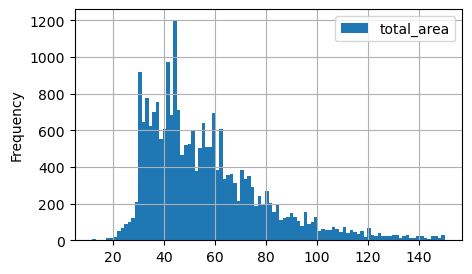

In [21]:
#Построим гистограмму для изучения общей площади и выведем данные столбца
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(12, 150))
data['total_area'].describe()

**Вывод:** Самое пиковое значение на гистограмме у квартир с площадью 45 квадратных метров. Много квартир с площадью от 30 до 45 метров квадратных. Также есть довольно объёмный участок от 45 до 60 квадратных метров. Потом плотность идёт на спад. У гистограммы есть хвост справа. В данных есть выбросы, но на среднее они не особо влияют.

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

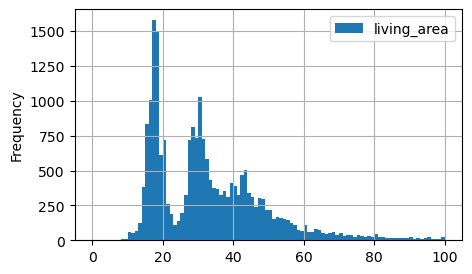

In [22]:
#Построим гистограмму для изучения жилой площади и выведем данные столбца
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 100))
data['living_area'].describe()

**Вывод:** Самое пиковое значение у жилой площади на отметке 17 кв. метров. Значения в основном распределяются от 14 до 50 кв. метров. Между этими значениями есть участок, в котором отражено мало значений. Квартир с жилой площадью от 21 о 25 кв. метров на рынке немного. Далее плотность идёт на спад. У гистограммы есть длинный хвост справа. Это говорит о том,что квартир с жилой площадью больше 55 кв. метров очень мало.

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

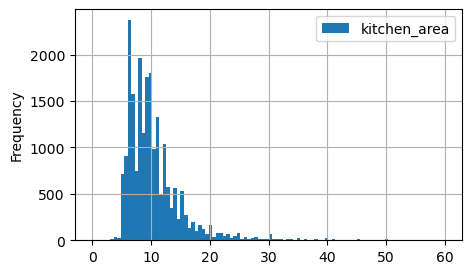

In [23]:
#Построим гистограмму для изучения площади кухни и выведем данные столбца
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 60))
data['kitchen_area'].describe()

**Вывод:** Основная масса значений располагается в диапазоне от 5 до 15 кв. метров. Больше всего квартир с кухней 7 кв. метров. У гистограммы есть хвост справа, показывающий, что кухонь с метражом больше 15 кв. метров очень мало.

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

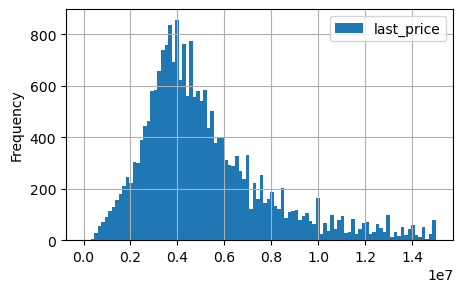

In [24]:
#Построим гистограмму для изучения цены объекта и выведем данные столбца
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 15000000))
data['last_price'].describe()

**Вывод:** Гистограмма имеет вид пирамиды с небольшим хвостом справа. Наибольшее количество квартир продаётся за 4 млн.р. Квартиры в основном продаются в диапазоне от 2 млн. р. до 6.5 млн.р. Мало квартир продаётся дороже, чем 7 млн.р.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

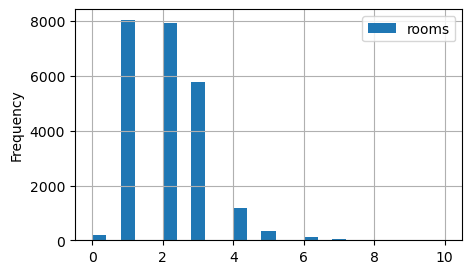

In [25]:
#Построим гистограмму для изучения количества комнат и выведем данные столбца
data.plot(y='rooms', kind='hist', bins=25, grid=True, figsize=(5, 3), range=(0, 10))
data['rooms'].describe()

**Вывод:** В данных есть выбросы, но на среднее это не влияет. На рынке больше всего однокомнатных и двухкомнатных квартир. Потом оидут трёхкомнатные. Четырёхкомнатных совсем мало и редко когда встречаются квартиры с пятью или больше комнатами. Студий тоже довольно мало.

count    23650.000000
mean         2.681725
std          0.232606
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

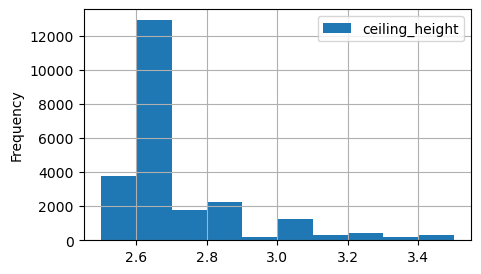

In [26]:
#Построим гистограмму для изучения высоты потолков и выведем данные столбца
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize=(5, 3), range=(2.5, 3.5))
data['ceiling_height'].describe()

**Вывод:** В основном на рынке у квартир потолки от 2.6 до 2.7 метров. Редко встречаются потолки ниже 2.6 метров и совсем реко выше 2.7 метров.

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

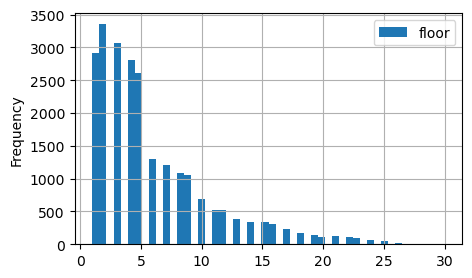

In [27]:
#Построим гистограмму для изучения этажа квартиры и выведем данные столбца
data.plot(y='floor', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(1, 30))
data['floor'].describe()

**Вывод:** Большая часть квартир находится в промежутке от 1 до 5 этажа. Потом количество квартир идёт на спад. Выше 12 этажа продаётся мало квартир. Возможно, квартиры во многоэтажках продаются реже.

count      23650
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

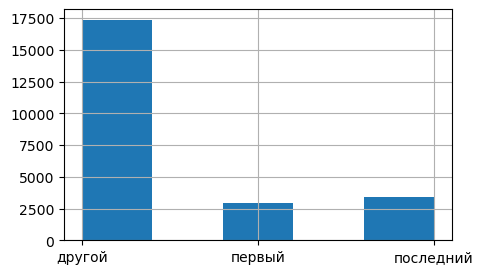

In [28]:
#Построим гистограмму для изучения типа этажа квартиры и выведем данные столбца
data['floor_category'].hist(bins=5, grid=True, figsize=(5, 3))
data['floor_category'].describe()

**Вывод:** Меньше всего квартир продаются на 1 этаже. Неалеко ушли картиры на последнем этаже. Чаще всего продатся квартиры в середине дома.

count    23650.000000
mean        10.673784
std          6.593455
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

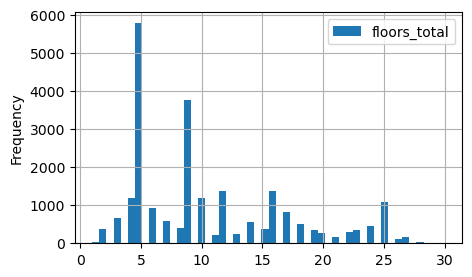

In [29]:
#Построим гистограмму для изучения общего количества этажей в доме и выведем данные столбца
data.plot(y='floors_total', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(1, 30))
data['floors_total'].describe()

**Вывод:** На рынке больше всего квартир продаётся в пятиэтажных домах. Можно предположить, что пятиэтажек построено намного больше, чем домов с другим количеством этажей. Недалеко от них ушли девятиэтажные дома, их тоже довольно много. Домов с другим количеством этажей не так много. Среди них выделяются 4-х, 10-ти, 12-ти, 16-ти и 25-ти этажные дома. Если рассматривать их отдельно от пятиэтажек и девятиэтажек, то квартир на продажу в тех домах примерно равное количество.

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

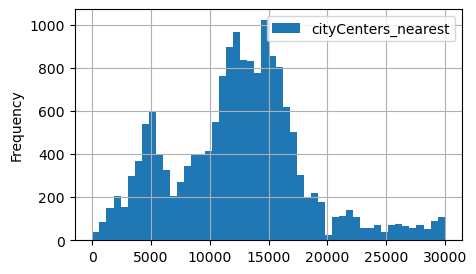

In [30]:
#Построим гистограмму для изучения расстояния до центра города в метрах и выведем данные столбца
data.plot(y='cityCenters_nearest', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(0, 30000))
data['cityCenters_nearest'].describe()

**Вывод:** Большинство квартир находится на расстоянии от 8000 до 17000 м от центра. Есть довольно внушительное количество квартир, расположенных на расстоянии от 4000 до 6000 м от центра. В остальных диапазонах квартир не так много.

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

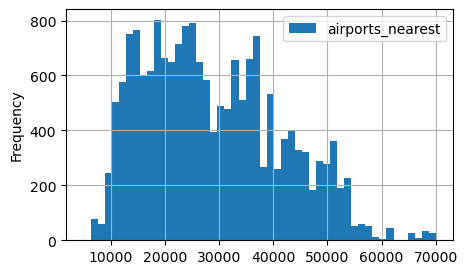

In [31]:
#Построим гистограмму для изучения расстояния до ближайшего аэропорта и выведем данные столбца
data.plot(y='airports_nearest', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(5000, 70000))
data['airports_nearest'].describe()

**Вывод:** В основном продаваемые квартиры находятся в диапазоне от 10000 до 55000 м до аэропорта. До 10000м расположено мало квартир. Начиная с 55000м идёт хвост, которы означает, что есть квартиры, находящиеся длеко от аэропорта, но их не так много. Больше всего квартир находятся на расстоянии в 20000м от аэропорта.

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

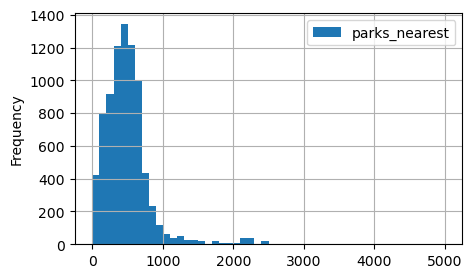

In [32]:
#Построим гистограмму для изучения расстояния до ближайшего парка и выведем данные столбца
data.plot(y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(0, 5000))
data['parks_nearest'].describe()

**Вывод:** В данных очень много пропусков по этому столбцу, поэтому гистограмма может быть неточной. По имеющимся данным видно, что у большинства квартир парк находится на расстоянии в 500м. В основном парки удалены от квартир не дальше, чем на 900 метров. С удалённостью парков больше 1000м не так много квартир.

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

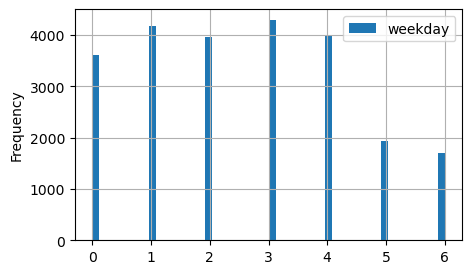

In [33]:
#Построим гистограмму для изучения дня публикации объявления и выведем данные столбца
data.plot(y='weekday', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(0, 6))
data['weekday'].describe()

**Вывод:** Преимущественно публикуются объявления в будние дни. В выходные публикуется почти в два раа меньше объявлений, чем в первые дни. В четверг подано больше всего объявлений, хоть разница с другими днями и не такая большая.

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

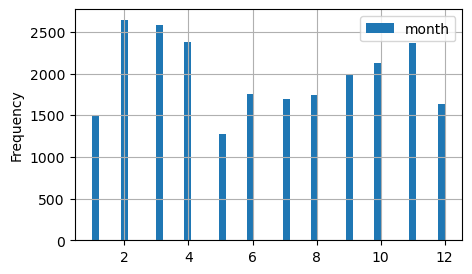

In [34]:
#Построим гистограмму для изучения месяца публикации объявления и выведем данные столбца
data.plot(y='month', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(1, 12))
data['month'].describe()

**Вывод:** Больше всего публикаций было в феврале, марте, апреле и ноябре. Меньше всего публикаций было в мае.

Среднее значение равно: 180.7531998045921
Медиана равна: 95.0


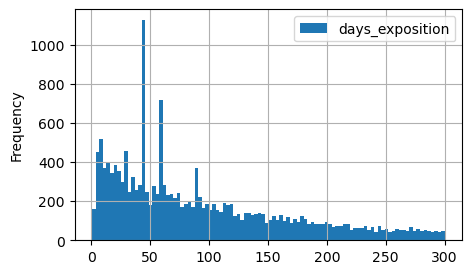

In [35]:
#Изучим, как быстро продавались квартиры
#Построим гистограмму по столбцу days_exposition
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(1, 300))
#Посчитаем среднее и медиану
print('Среднее значение равно:', data['days_exposition'].mean())
print('Медиана равна:', data['days_exposition'].median())

**Вывод:** Самое пиковое значение у отметки в 45 дней. Чуть поменьше - 60 дней. Некоторые объекты продаются более 300 дней, но тут нужно учесть, что некоторые объявления забывают снимать с публикации после продажи, и объявление так и висит многие месяцы. Среднее время продажи составляет 180 дней. Медианное - 95 дней. Судя по гистограмме быстрыми продажами можно посчитать диапазон от 1 до 60 дней. Долгими - диапазон от 200 и выше. Следует отметить, что на сайте Яндекс.Недвижимость объявления автоматически акрываются каждые 45 и 60 дней, что искажает данные. Можно было бы их удалить, но тогда могут потеряться данные о реальной продаже в эти дни.

0.6537428966335399


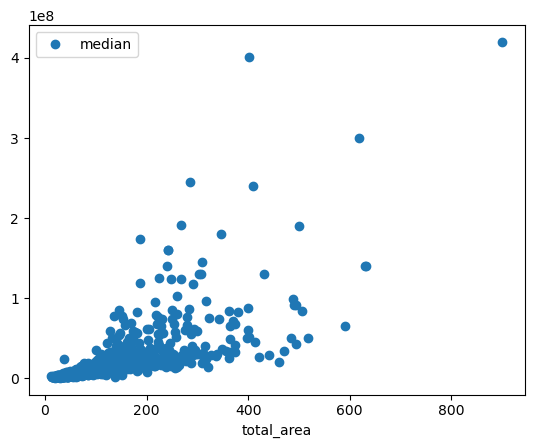

In [36]:
#Изучим зависимость полной стоимости от общей площади
total_area_pt = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'count', 'median'])
total_area_pt.columns = ['mean', 'count', 'median']
total_area_pt.plot(y='median', style='o')
total_area_pt.sort_values('median', ascending=False)

print(data['total_area'].corr(data['last_price']))

**Вывод:** Цена ощутимо зависит от общей площади. Корреляция Пирсона равна 0.6. Это доказывает, что чем больше площадь квартиры, тем выше цена за эту квартиру.

0.5665168840375518


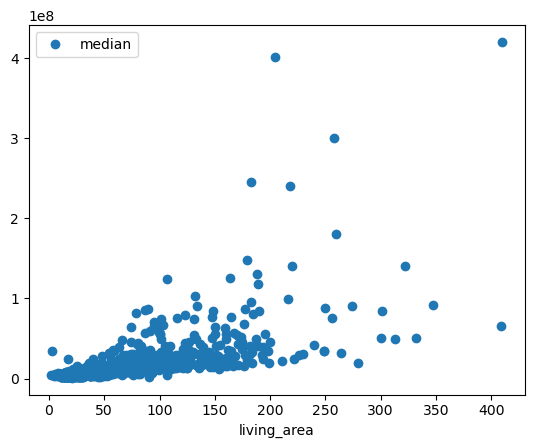

In [37]:
#Изучим зависимость стоимости от жилой площади
living_area_pt = data.pivot_table(index='living_area', values='last_price', aggfunc=['mean', 'count', 'median'])
living_area_pt.columns = ['mean', 'count', 'median']
living_area_pt.plot(y='median', style='o')
living_area_pt.sort_values('median', ascending=False)

print(data['living_area'].corr(data['last_price']))

**Вывод:** Корреляция Пирсона равна 0.5. Значит, метраж жилой площади влияет на общую стоимость квартиры. Чем больше площадь, тем больше стоимость квартиры.

0.5202330465436195


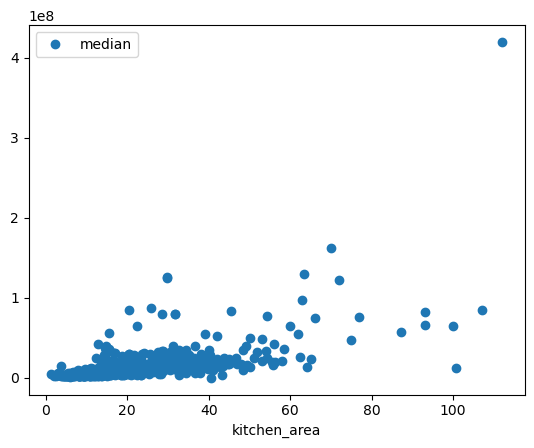

In [38]:
#Изучим зависимость стоимости от площади кухни
kitchen_area_pt = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean', 'count', 'median'])
kitchen_area_pt.columns = ['mean', 'count', 'median']
kitchen_area_pt.plot(y='median', style='o')
kitchen_area_pt.sort_values('median', ascending=False)

print(data['kitchen_area'].corr(data['last_price']))

**Вывод:** Корреляция Пирсона составляет также 0.5. Зависимость стоимости есть, чем выше метраж кухни, тем выше стоимость квартиры. Хотя из графика видно, что это единичные случаи. Больше всего скопление в диапазоне от 0 до 55 кв. метров. И цена там не сильно различается.

0.36342062218770665

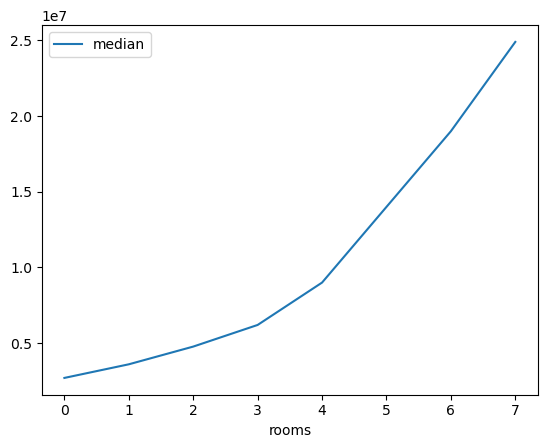

In [39]:
#Изучим зависимость стоимости от количества комнат
rooms_pt = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_pt.columns = ['mean', 'count', 'median']
rooms_pt.query('count > 50').plot(y = 'median')

rooms_pt.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

**Вывод:** Зависимость есть. С увеличением числа комнат, стоимость квартиры растёт.

,mean,count,median
floor_category,,,
другой,6.674349e+06,17326,4848500
первый,4.800465e+06,2912,3900000
последний,7.350214e+06,3412,4350000


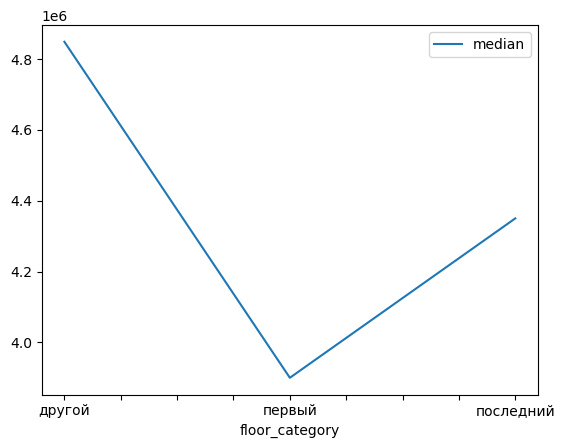

In [40]:
#Изучим зависимость стоимости от этажа, на котором расположена квартира (первый, последний, другой)
floor_category_pt = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
floor_category_pt.columns = ['mean', 'count', 'median']
floor_category_pt.plot(y = 'median')
floor_category_pt

**Вывод:** Из графика видно, что у квартир, расположенных на первом этаже, самая низкая цена. Самая высокая - у квартир, расположенных между первым и последним этажами. Цена на квартиры на посленем этаже не намного меньше цены на квартиры в середине дома. Цена зависит от этажа, если это первый или последний, осальные этажи будут примерно в одной ценовой категории.

,mean,count,median
weekday,,,
1,6.393782e+06,4175,4720000
2,6.626416e+06,3966,4700000
0,6.510815e+06,3606,4650000
3,6.711767e+06,4286,4650000
4,6.364605e+06,3992,4577500
5,6.982510e+06,1933,4575000
6,6.249360e+06,1692,4550000


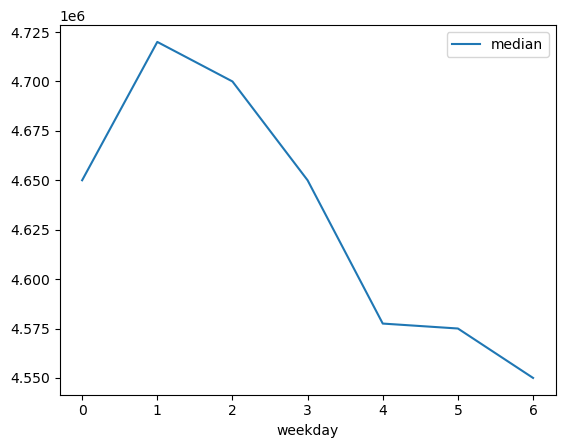

In [41]:
#Изучим зависимость стоимости от дня размещения
weekday_pt = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_pt.columns = ['mean', 'count', 'median']
weekday_pt.plot(y = 'median')

weekday_pt.sort_values('median', ascending = False)

**Вывод:** Из графика можно сделать вывод, что цена зависит от дня размещения объявления. Во вторник публикуются самые дорогие объявления. К концу недели цена на квартиры идёт на спад. В воскресенье устанавливается самая низкая цена. Хотя разница между самой высокой и самой низкой ценой не такая большая. Это связано с тем, что в выходные публикуется почти в два раза меньше объявлений. 

,mean,count,median
month,,,
4,6.742671e+06,2373,4800000
9,6.828471e+06,1979,4700000
11,6.461458e+06,2367,4700000
12,7.005343e+06,1638,4695000
2,6.464463e+06,2639,4650000
3,6.362919e+06,2582,4650000
7,6.641336e+06,1690,4650000
1,6.666975e+06,1491,4600000
8,6.352839e+06,1742,4570000


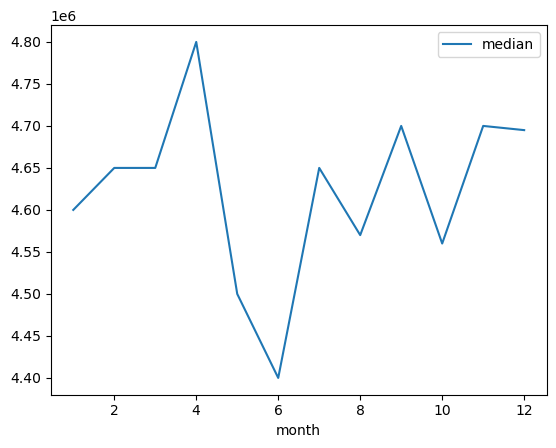

In [42]:
#Изучим зависимость стоимости от месяца размещения
month_pt = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_pt.columns = ['mean', 'count', 'median']
month_pt.plot(y = 'median')

month_pt.sort_values('median', ascending = False)

**Вывод:** Самая высокая цена у объявлений, опубликованных в апреле, самая низкая - в июне. С начала года до апреля цена растёт, потом происходит падение. Возможно это связано с началом летнего сезона. Потом цена находится примерно в одном диапазоне. Повышается в нечётные месяцы, понижается в чётные.

,mean,count,median
year,,,
2014,1.204660e+07,136,7640000
2015,8.592727e+06,1173,5350000
2019,6.782388e+06,2879,5050000
2016,6.829415e+06,2765,4550000
2018,5.952216e+06,8512,4550000
2017,6.585822e+06,8185,4500000


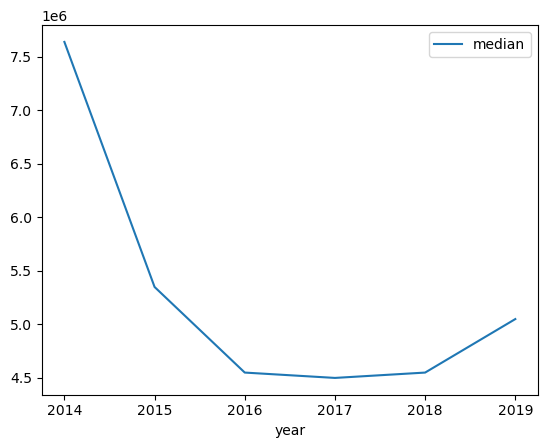

In [43]:
#Изучим зависимость стоимости от года размещения
year_pt = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_pt.columns = ['mean', 'count', 'median']
year_pt.plot(y = 'median')

year_pt.sort_values('median', ascending = False)

**Вывод:** В 2014 году было подано меньше всего объявлений, этот год мы не будем учитывать. В 2017 и 2018 году было больше всего объявлений(8000 против 2000 в остальные годы), но медианная цена у них меньше всего. В 2016 году подано 2000 объявлений, а медианная цена совпадает с 2018 годом. Самая высокая цена была в 2015 и 2019 годах. И этого можно сделать вывод, что год подачи объявления влияет на цену, а точнее мировая обстановка на это влияет.

,mean,count,median
year,,,
2014,86.225956,136,76.18
2015,71.569923,1173,60.00
2016,62.143852,2765,53.02
2017,60.746788,8185,52.00
2019,59.467864,2879,52.00
2018,57.666359,8512,50.50


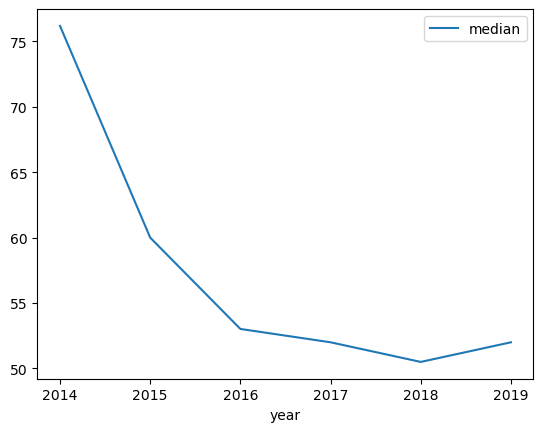

In [44]:
#Изучим зависимость площади от года подачи объявления
area_pt = data.pivot_table(index = 'year', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
area_pt.columns = ['mean', 'count', 'median']
area_pt.plot(y = 'median')

area_pt.sort_values('median', ascending = False)

**Вывод:** С каждым годом площадь продаваемых квартир уменьшалась, только в 2019 году немного подросла по сравнени с предыущим годом. А так так цена зависит от площади, то и стоимость объектов снижалась соответственно. Зависимости цены от года нет, всё идёт от площади объектов.

In [45]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и 
#выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра
local_pt = data.pivot_table(index = 'locality_name', values = 'one_met_price', aggfunc=['count', 'mean'])
local_pt.columns = ['count', 'mean']
local_pt = local_pt.sort_values('count', ascending = False).head(10)
print(local_pt)
#самая высокая стоимость
max_price = local_pt[local_pt['mean']==local_pt['mean'].max()]
#самая низкая стоимость
min_price = local_pt[local_pt['mean']==local_pt['mean'].min()]

display(max_price)
display(min_price)

                   count           mean
locality_name                          
Санкт-Петербург    15721  114848.565231
посёлок Мурино       522   85751.733716
посёлок Шушары       440   78676.904545
Всеволожск           398   68654.007538
Пушкин               369  103125.373984
Колпино              338   75424.150888
посёлок Парголово    327   90175.489297
Гатчина              307   68745.693811
деревня Кудрово      299   92473.086957
Выборг               237   58141.489451


,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


,count,mean
locality_name,,
Выборг,237,58141.489451


In [46]:
#Посчитаем медианную цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и 
#выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра
local_pt = data.pivot_table(index = 'locality_name', values = 'one_met_price', aggfunc=['count', 'median'])
local_pt.columns = ['count', 'median']
local_pt = local_pt.sort_values('count', ascending = False).head(10)
print(local_pt)
#самая высокая стоимость
max_price = local_pt[local_pt['median']==local_pt['median'].max()]
#самая низкая стоимость
min_price = local_pt[local_pt['median']==local_pt['median'].min()]

display(max_price)
display(min_price)

                   count    median
locality_name                     
Санкт-Петербург    15721  104761.0
посёлок Мурино       522   85878.0
посёлок Шушары       440   76876.0
Всеволожск           398   65789.0
Пушкин               369  100000.0
Колпино              338   74723.5
посёлок Парголово    327   91642.0
Гатчина              307   67796.0
деревня Кудрово      299   91860.0
Выборг               237   58158.0


,count,median
locality_name,,
Санкт-Петербург,15721,104761.0


,count,median
locality_name,,
Выборг,237,58158.0


**Вывод:** Самая высокая цена за один кв. метр на жильё в Санкт-Петербурге. Самая низкая - в Выборге.

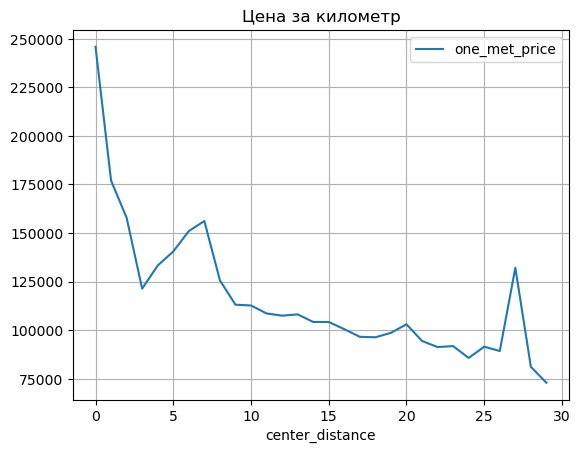

In [47]:
#Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра
data_spb = data.copy()
data_spb = data_spb.query('locality_name == "Санкт-Петербург"')
data_spb.loc[:, 'center_distance'] = (data_spb.loc[:, 'cityCenters_nearest']/1000).round()
data_spb_km = data_spb.pivot_table(index = 'center_distance', values = 'one_met_price', aggfunc = 'mean')
data_spb_km.plot(grid = True, title = 'Цена за километр')
plt.show()

**Вывод:** Из графика видно, что цена на квартиры увеличивается по мере приближения к центру. Есть 2 пика на отметках в 27 и 7 км. Может быть эти объекты намного лучше своих конкурентов, находящихся на том же расстоянии от центра, от того и цена у них выше. Другой вариант - собственники квартир установили слишком высокие цены просто потому что захотели. Начиная с отметки в 3км, цена начинает расти очень быстро. Получается, чем ближе к центру находится квартира, тем она будет дороже.

### Общий вывод

В ходе работы было сделано:
* Определены пропуски и обозначены варианты их заполнения
* Пропуски заменены на значения там, где это было возможно
* Определены и исправлены аномалии в данных
* Названия населённых пунктов приведены к общему виду
* Изменены типы данных там, где это было необходимо
* Добавлены столбцы в датасет для лучшего изучения картины
* Проведён анализ имещихся данных, в котором выяснилось, что:
    + Цена квартиры зависит в основном от метража, удалённости от центра и немного от этажа
    + Квартиры в среднем продаются 180 дней, но есть квартиры, которые продаются 200 дней и дольше
    + В Санкт-Петербурге самая высокая цена на квартиры
    + В Выборге самая низкая цена на квартиры